# Lecture 6 - Probability and Linear Algebra

### Hosted and maintained by [SAAS Berkeley](saas.berkeley.edu)


### Table of Contents
* [Counting](#count)
* [Probability](#prob)
* [Random Variables](#rv)
* [Expectation and Variance](#expvar)  
* [Binomial Distribution](#binomial)
* [Density Functions](#density)
* [Normal Distribution](#normal)
* [References/Resources](#ref)

* [Linear Algebra](#linear_algebra)  
    * [Motivation](#motivation)  
    * [Notation](#notation)  
    * [Matrix Terminology](#terminology) 
    * [Matrix Operations](#operation) 
        * [Transpose](#transpose)
        * [Addition & Subtraction](#addsub)
        * [Scalar Multiplication](#scalar_mul)
        * [Matrix Multiplication](#matrix_mul)
    * [Linear Independence](#linear_independence) 
    * [Invertibility](#invert) 
    * [Matrix Operations in numpy](#operation)
        * [Scalar Multiplication](#Scaler-Multiplication)
        * [Matrix Multiplication](#Matrix-Multiplication)
        * [Matrix Inverse](#Matrix-Inverse) 
        * [Matrix Linear Independence](#Matrix-Linear-Independence) 
        * [Matrix Transpose](#Matrix-Transpose)
     * [Optimal $\hat{\beta}$](#loss)
        * [OLS](#loss)
        * [Gradient Descent](#grad)


Authored by Drew Colmenar, [Carlos Gonzalez](carlos01oscar@berkeley.ed), Harry Dong, Chinmay Gharpure, Jessica Wang, and Ritvik Iyer.

In [1]:
# initial
# Setup code
import seaborn as sns
import csv
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,8)
plt.rcParams['figure.dpi'] = 150
sns.set()

from IPython.display import display, Latex, Markdown

<a id='count'></a>
# Counting

**Permutation**: the ordered arrangement of k items out of a list of n. Calculated using the formula $_nP_k = \frac{n!}{(n-k)!}$ or use the built in function: <br><br>`scipy.special.perm(n,k,exact = False)` *(when exact = false, any floats are rounded to the nearest integer)*<br><br>For example, you and 4 other friends (Sakchhi, Nathan, Drew, Carlos) are visiting Imm Thai for the first time. There are 6 different entrees you can order from the menu (Pad Thai, Pad Se Ew, Chicken Curry, Duck Curry, Noodle Soup, Fried Rice). You each want to order a different dish. Permutation is the different ordered arrangement you guys can pick.<br><br> Do you think order matters in this case? Why?

**Question:** write out some permutations for Imm Thai example <br>
*answer here* <br>
**Question:** use the formula or function provided above, calculate the permutation. What is n? What is k? <br>
*answer here*

In [2]:
# your code here


**Combination**: all possible groupings of k items out of a list of n. Calculated using the formula $_nC_k = \frac{n!}{(n-k)!k!}$ or using the built in function: <br><br> `scipy.special.comb(n,k,exact = False, repetition = False)` *(when repetition = True, each element can be used more than one time)*<br><br>
For example, the education committee needs to choose a group of 2 people to design and present the next CX lecture. Combination is the different possible groups we can choose. <br><br>
Does order matter in this case? Why?

**Question:** Last semester's education committee included: Chinmay, Derek, Frank, Jade, Jasmine, Jessica, Leah, Minh, Ritvik, Robert, Zaid. Write out some possible lecturer combinations. <br>
*answer here* 
<br> **Question:** Use the formula or function provided above, calculate the combination? What is n? What is k?

In [3]:
# your code here


[Here](https://youtu.be/p8vIcmr_Pqo) is a helpful video that shows how to derive the formulas for permutation and combination.

<a id='prob'></a>
# Probability

How do you define probability?


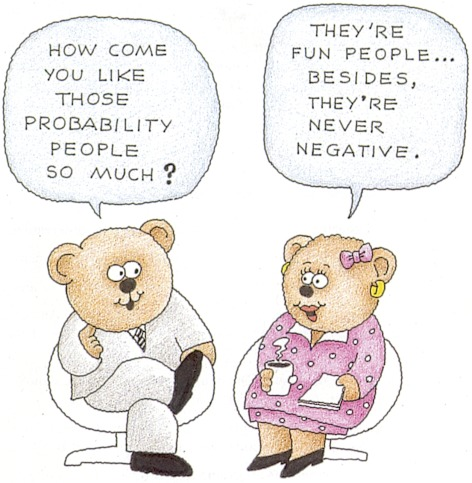

One definition is the branch of mathematics that calculates, estimates, or simulates the likelihood of a given event. In today's lesson we will explore various probability properties, definitions, and distributions.

## Adding
**Mutually Exclusive**: Given two events, at most one can occur. Both events cannot occur simultaneously.

Examples: 
<ol>
<li>Flipping heads or tails in one coin toss</li>
<li>Getting an even or odd number in one roll of a die</li>
<li>Drawing a face card or number card from a standard deck of 52 cards</li>
<li><b>Fill this in with your own example</b></li>
</ol>


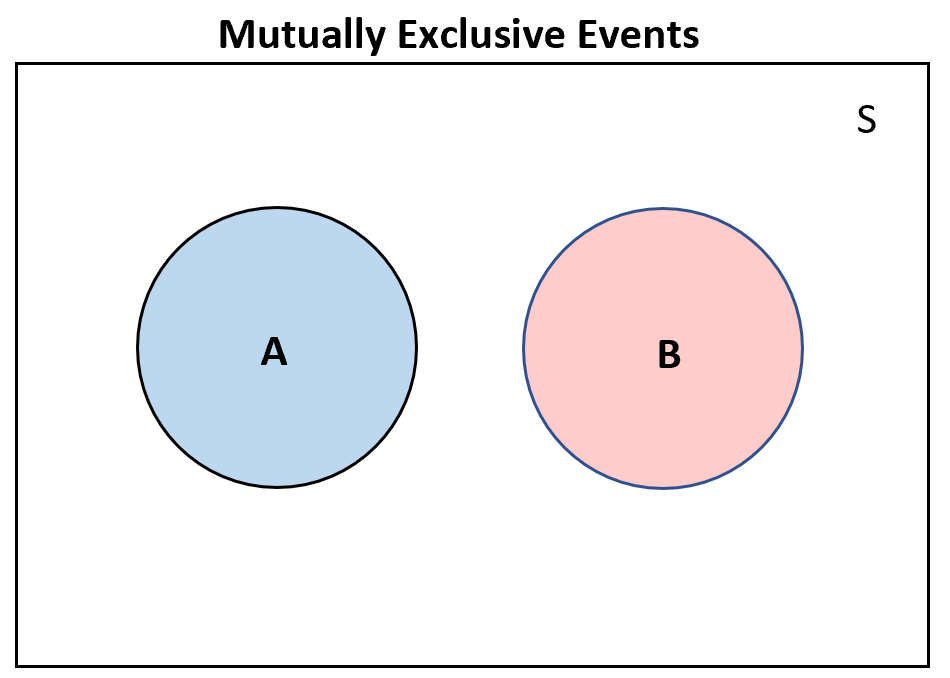

**Addition Rule**: If two events $A$ and $B$ are mutually exclusive, then the probability that either event will occur (the **union** of $A$ and $B$) is the sum of the probabilities that each individual event will occur, so $P(A \cup B) = P(A) + P(B)$.

**Exercise**: In the cell below, calculate the probability that either you draw a face card or a number card. 

**Hint**: A standard deck of 52 cards has 4 suites and each suite has 3 face cards (King, Queen, and Jack) and 9 number cards (2 through 10).

In [4]:
prob_face_card = ...
prob_number_card = ...
prob_face_or_number = ...
prob_face_or_number

Ellipsis

The Addition Rule can be expanded to multiple events, as long as they are all mutually exclusive. 

Given $n$ mutually exclusive events $A_1, A_2, ... , A_n$, then:

$$P(\bigcup_{i=1}^{n}A_i) = \sum_{i=1}^{n}P(A_i)$$

**Question**: What happens when two events $A$ and $B$ are ***not*** mutually exclusive? 

This means there is a nonzero probability that both events occur, which is the **intersection** of $A$ and $B$. We denote this as the $P(A\cap B)$, which is often written as $P(A$ and $B)$ or $P(AB)$. The intersection is represented by the shaded region in the figure below.

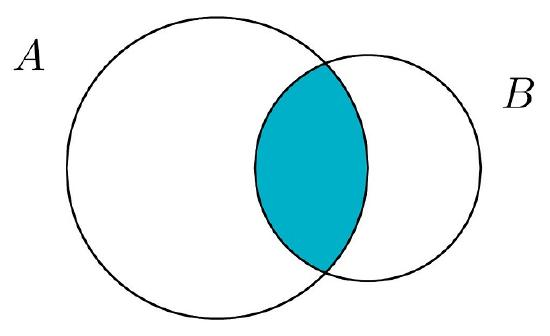

In order to calculate the probability that either $A$ or $B$ occurs, we have to subtract the intersection of the two events otherwise we count this probability twice. This means that $P(A\cup B) = P(A) + P(B) - P(A \cap B)$.

**Exercise**: Suppose we randomly choose a DF member from the list of 8 names below. Calculate the probability that we choose either a name with 7 letters or a name with 3+ syllables.
 - **List of DF members**: 
- Abby (2 syllables)
- Alex (2 syllables)
- Angelina (4 syllables)
- Etai (2 syllables)
- Jessica (3 syllables)
- Kathryn (2 syllables)
- Nomin (2 syllables)
- Surya (2 syllables)


In [5]:
prob_7_letters = ...
prob_2_syllables = ...
prob_both = ...
prob_either = ...
prob_either

Ellipsis

Give an example of two mutually exclusive events possible when choosing a random DF member.

**Inclusion-Exclusion Principle**: The calculation of the union of events can also be extended to multiple, not necessarily mutually exclusive events. 

Given $n$ events $A_1, A_2, ... , A_n$, then:

$$P(\bigcup_{i=1}^{n}A_i) = \sum_{i=1}^{n}P(A_i) - \sum_{1\leq{i}<}\sum_{j\leq{n}}P(A_iA_j) + \sum_{1\leq{i}<}\sum_{j<k}\sum_{\leq{n}}P(A_iA_jA_k) - ... + (-1)^{n+1}P(A_1A_2...A_n)$$

This formula looks complicated but it's just the result of including the probabilities of all events, excluding intersections of two events, including intersections of three events, exlcuding intersections of four events, etc.

Check out this cool [matching problem](http://prob140.org/textbook/content/Chapter_05/03_The_Matching_Problem.html) using Inclusion-Exclusion.

**Complement**: Given an event $A$, the complement of $A$ (denoted by $A^C$) is the probability that $A$ does ***not*** happen. Since the total probability adds up to one, this means that $P(A^C) = 1 - P(A).$

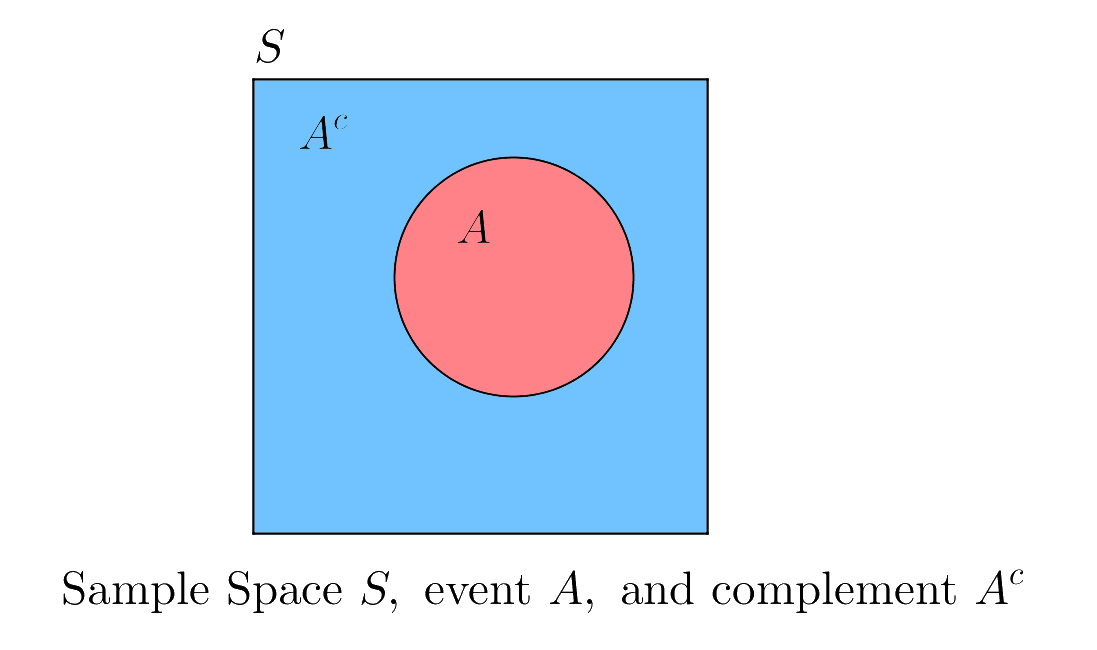

**Note**: Sometimes, calculating the probability of the complement of an event is easier than calculating the probability of the event. In the example from earlier of calculating the probability of drawing either a face card or a number card, we might notice that Ace is the only card that is not a face or number card. 

**Exercise**: In the cell below, calculate the probability of ***not*** drawing an Ace.

In [6]:
# your code here

Compare this with the probability we calculated before using the Addition Rule:

In [7]:
prob_face_or_number

Ellipsis

## Multiplication

**Conditional Probability**: Suppose we have two events, $A$ and $B$. The conditional probability of $A$ given $B$, denoted as $P(A | B)$, is the probability that $A$ occurs, given that $B$ has already occurred. We calculate this with the following formula: $$P(A | B) = \frac{P(A\text{ and }B)}{P(B)}$$

**Multiplication Rule**: The probability that both $A$ and $B$ occur can be calculated using conditional probability as defined above. 

$$P(AB) = P(A | B) * P(B)$$

**Exercise**: How would you calculate $P(AB)$ using $P(B | A)$? Replace the question mark with your answer below.

$$P(AB) = P(B | A) * ?$$

**Independence**: $A$ and $B$ are independent if $P(A|B) = P(A)$. This means that the outcome of $B$ does not affect the outcome of $A$ and vice versa. Using the Multiplication Rule, we can see that $P(AB) = P(A) * P(B)$

***Bayes' Rule***: Using $P(A \cap B) = P(A | B) P(B)$ and $P(A \cap B) = P(B | A) P(A)$, we can set both right hand sides equal to one another with $P(A | B) P(B) = P(B | A) P(A)$. Dividing both sides by $P(B)$, we get Bayes' Rule: $$P(A | B) = \frac{P(B | A) P(A)}{P(B)}$$ The right-hand side of the equation is also equal to $\frac{P(B | A) P(A)}{P(B | A) P(A) + P(B | A^c) P(A^c)}$, where the denominator makes use of the Law of Total Probability. Essentially, we are finding all possible ways that B can occur given whether A occurs (or not), and then adding the probabilities.

Bayes' Rule is extremely useful for calculating conditional probabilities because sometimes $P(B|A)$ is much easier to calculate then $P(A|B)$.

**Exercise**: Using the complement rule and independence, calculate the probability that in 10 rolls of a fair die, at least one 6 is rolled.

In [8]:
# your code here

<a id='rv'></a>
# Random Variables
So far, we have been referring to events such as $A$ and $B$ but have not formally defined them as variables.

**Random Variable**: A numerical function defined on an outcome space.

In the example below, our random variable $X$ represents the toss of a coin where the outcome space is $\{H, T\}$.

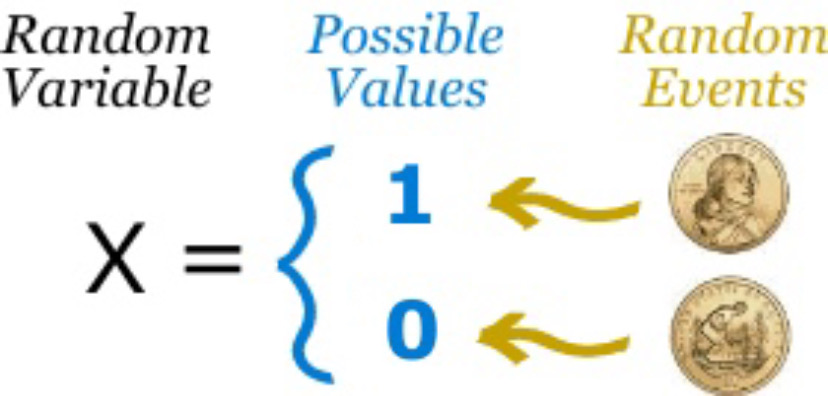

**Note**: If the probability that the coin lands as heads is $p$ and the probability that the coin lands as tails is $1-p$, then $X$ has a **Bernoulli(p)** distribution. One toss of a fair coin has a $Bernoulli(.5)$ distribution. Rolling a 6 vs. any other number on a fair die has a $Bernoulli(1/6)$ distribution.


The code below gives us the outcome space of two tosses of a coin.

In [9]:
from itertools import product
one_toss = np.array(['H', 'T'])
two_tosses = list(product(one_toss, repeat=2))
two_tosses

[('H', 'H'), ('H', 'T'), ('T', 'H'), ('T', 'T')]

<a id='expvar'></a>
# Expectation and Variance
**Expectation**: The expected value of a random variable $X$ is the average of the possible values weighted by each respective probability. 

$$E(X) = \sum_{\text{all } x}xP(X=x)$$

For a $Bernoulli(p)$ variable $X$, we have the following possible values and their corresponding probabilities:

| Possible Values | Probability |
| -----------     | ----------- |
| 1               | $p$         |
| 0               | $1-p$       |

So the calculation of the expectation of $X$ is $E(X) = 1*P(X=1) + 0*P(X=0) = 1(p) + 0(1-p) = p$.

**Exercise**: What is the expected value of rolling a fair die? Use the cell below for calculations if you need it.

In [10]:
# Use this cell to calculate the expectation of rolling a fair die


The code below simulates 10,000 rolls of a fair die and calculates the mean. Compare this to your expected value.

In [23]:
die_rolls = []
for i in range(10000): # Try changing the number of rolls to see what happens
    one_roll = np.random.randint(1, 7)
    die_rolls.append(one_roll)
np.mean(die_rolls)

3.5421

**Exercise**: What if we had an unfair die. Let's say for each roll you have a 1/10th chance of landing each side 1-5. That means there's a 5/10th chance you land a 6. What would the Expected Value of rolling this dice be?

The expectation of a random variable can be thought of as the long run average value of independently generated values of the variable.

**Linearity of Expectation**
<ol>
<li>The expected value of a constant is itself. So given a constant $c$, $E(c) = c$.</li>
<li>Expectation is <b>additive</b>. This means that for two random variables $X$ and $Y$, $E(X+Y) = E(X) + E(Y)$ </li>
</ol>

When we combine these two properties, we get the linearity of expectation.

For some constant $c$ and random variables $X$ and $Y$: $$E(cX+Y) = c*E(X) + E(Y)$$.

Note that there are no assumptions about $X$ and $Y$, they could be independent or dependent.

**Exercise**: Given $E(X) = 9$ and $E(Y) = 4$, replace the question mark with the answer to the equation below.

$$E(2X-3Y+6) = ?$$


**Variance**: The variance of a random variable $X$ (often denoted as $\sigma_{x}^2$) is the expected value of the square of deviations from the mean. 

$$Var(X) = \sigma_{x}^{2} = E((X-E(X))^2)$$ 

Let $E(X) = \mu_x$ then we have:

$$Var(X) = \sigma_{x}^{2} = E((X-\mu_x)^2)$$ 


**Standard Deviation**: The standard deviation of $X$ (often denoted as $\sigma_{x}$) is simply the square root of the variance. This puts the standard deviation in the same units as $X$ and $E(X)$. 

$$\sigma_x = \sqrt{E((X-\mu_x)^2)}$$


**Properties of Variance and Standard Deviation**
<ol>
<li>Given a constant c, $Var(cX) = c^2Var(X) = c^2\sigma_{x}^2$.</li>
<li>For standard deviation, $SD(cX) = |c|SD(X) = |c|\sigma_x$. </li>
<li>Shifts do not affect variance since the values are still the same in relation to each other. So for a constant $b$, $Var(X + b) = Var(X) = \sigma_{x}^2$.</li>
<li>Similarly for standard deviation, $SD(X + b) = SD(X) = \sigma_x$</li>
    
</ol>

**Exercise**: Using properties we have learned so far, calculate $Var(X)$ in terms of $E(X)$ and $\mu_{x}^2$.

Check your answer [here](http://prob140.org/textbook/content/Chapter_12/01_Definition.html#computational-formula-for-variance).

<a id='binomial'></a>
# Binomial Distribution

Earlier we defined the $Bernoulli(p)$ distribution. The binomial distribution is an extension of the Bernoulli distribution and finds the probability of $k$ successes in $n$ independent Bernoulli trials each with probability $p$ of success.

If a random variable $X$ has a $binomial(n, p)$ distribution, then:

$$P(X=k) = {n \choose k}p^k(1-p)^{n-k}$$ 


**Exercise**: Find the probability that you get exactly 7 heads in 15 tosses of a biased coin where $p = .25$.

**Hint**: Feel free to use `scipy.special.comb(n, k)`. Documentation is linked [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html)

In [12]:
prob_7_H = ...
prob_7_H

Ellipsis

Now calculate this exercise using `stats.binom.pmf(k, n, p).` Documentation is linked [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html)

In [13]:
prob_7_H = ...
prob_7_H

Ellipsis

<a id='density'></a>
# Density Function

Given $x$ is a continuous random variable, probability density function $f(x)$ represents the probability of outcome being equal to a particular $x$ value. <br><br>
$f$ must be a non-negative function on the real number line and $$
\int_{-\infty}^\infty f(x)dx ~ = 1
$$

**Example**<br>
Assume Drew's lecture performance is a continuous variable from 0 to 1. Her performance follows the probability density function below:
<br>
$$
f(x) = 
\begin{cases}
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \le 0 \\
6x(1-x) ~~~~~ \text{if } 0 < x < 1 \\
0 ~~~~~~~~~~~~~~~~~~ \text{if } x \ge 1 \\
\end{cases}
$$

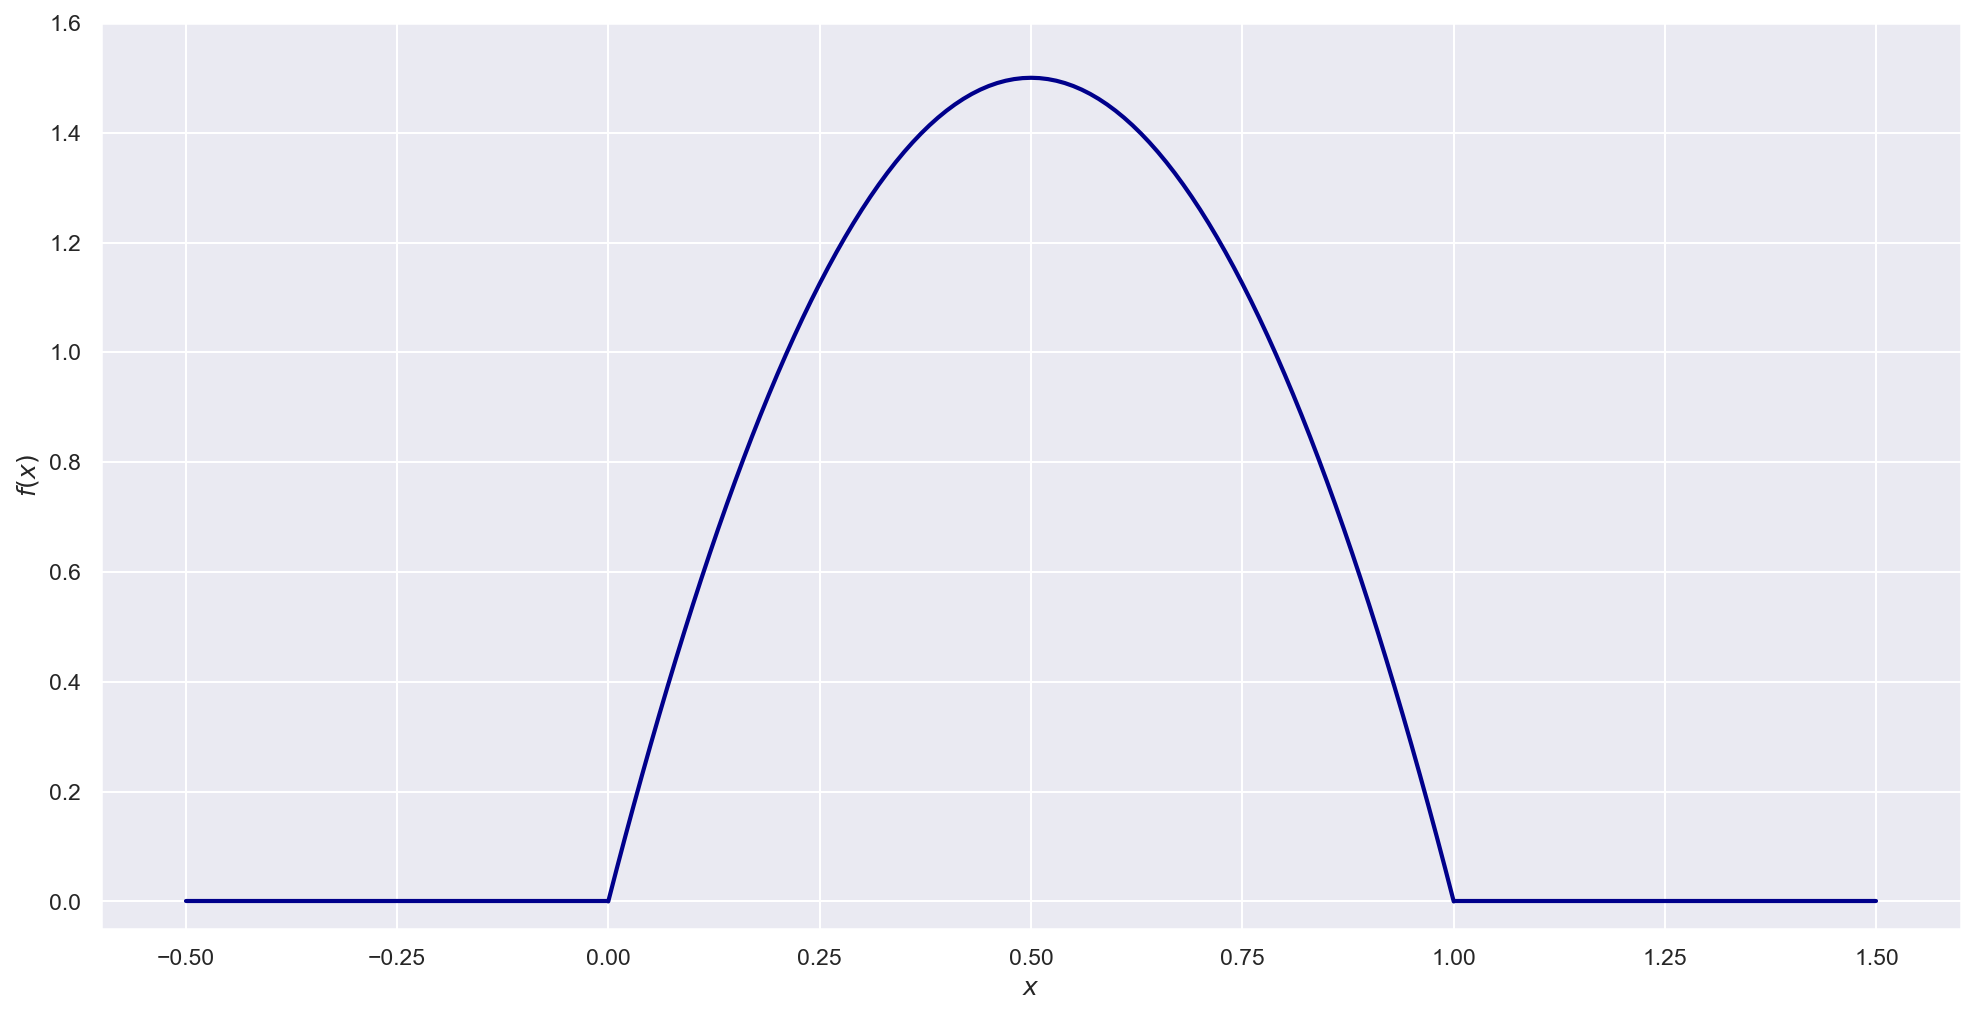

In [14]:
#graph of f(x)
def f(x):
    return 6*x*(1-x)

x = np.arange(0, 1.01, 0.01)
plt.plot(x, f(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [0, 0], color='darkblue', lw=2)
plt.ylim(-0.05, 1.6)
plt.xlabel('$x$')
plt.ylabel('$f(x)$');

### Density is Not the Same as Probability ###
In the example above, $f(0.5) = 6/4 = 1.5 > 1$. Indeed, there are many values of $x$ for which $f(x) > 1$. So the values of $f$ are clearly not probabilities. It does not mean that Drew has a 1.5 probability of getting $0.5/1$.

The focus of probability density graphs is the area under the curve and not the height of the curve itself. The area under the density curve represents the probability.

To calculate the probability of Drew getting a score between 0.5 and 0.75, we can use the area under the density curve from 0.5 to 0.75. Given $f(x) = 6x(1-x)$ for $0 < x < 1$, we can find the area by taking the integral $\int_{0.5}^{0.75} f(x)dx$ = $0.34375$ <br>
This means Drew has a roughly 0.34 chance of getting a score between 0.5 and 0.75.

<img src='0.5-0.75.jpg' style='width: 300px'></img>

**Question:** why do all probability density functions have to follow $\int_{-\infty}^\infty f(x)dx ~ = 1$ ? <br>
*answer here*
<br>**Question:** why does the probability density function have to be a postive function? <br>
*answer here*

**Check-in question:**<br>
Can this function be a density function? Why? <br>
$f(x) = 0.5x$ for $0 < x < 8$
<br> How about this one? <br>
$f(x) = x-2$ for $0 < x < 3$

### Cumulative Distribution Function or CDF ###

The cumulative distribution function is $F(x) = f(X\le x)$ where $f(x)$ is the probability density function. In other words, $F(x)$ is equal to the probability of the random variable outcome being less than or equal to a particular x value.

This graph shows that Drew has a roughly 0.85 chance of getting a score of 0.75. We can compute the exact value using the cdf function we created.

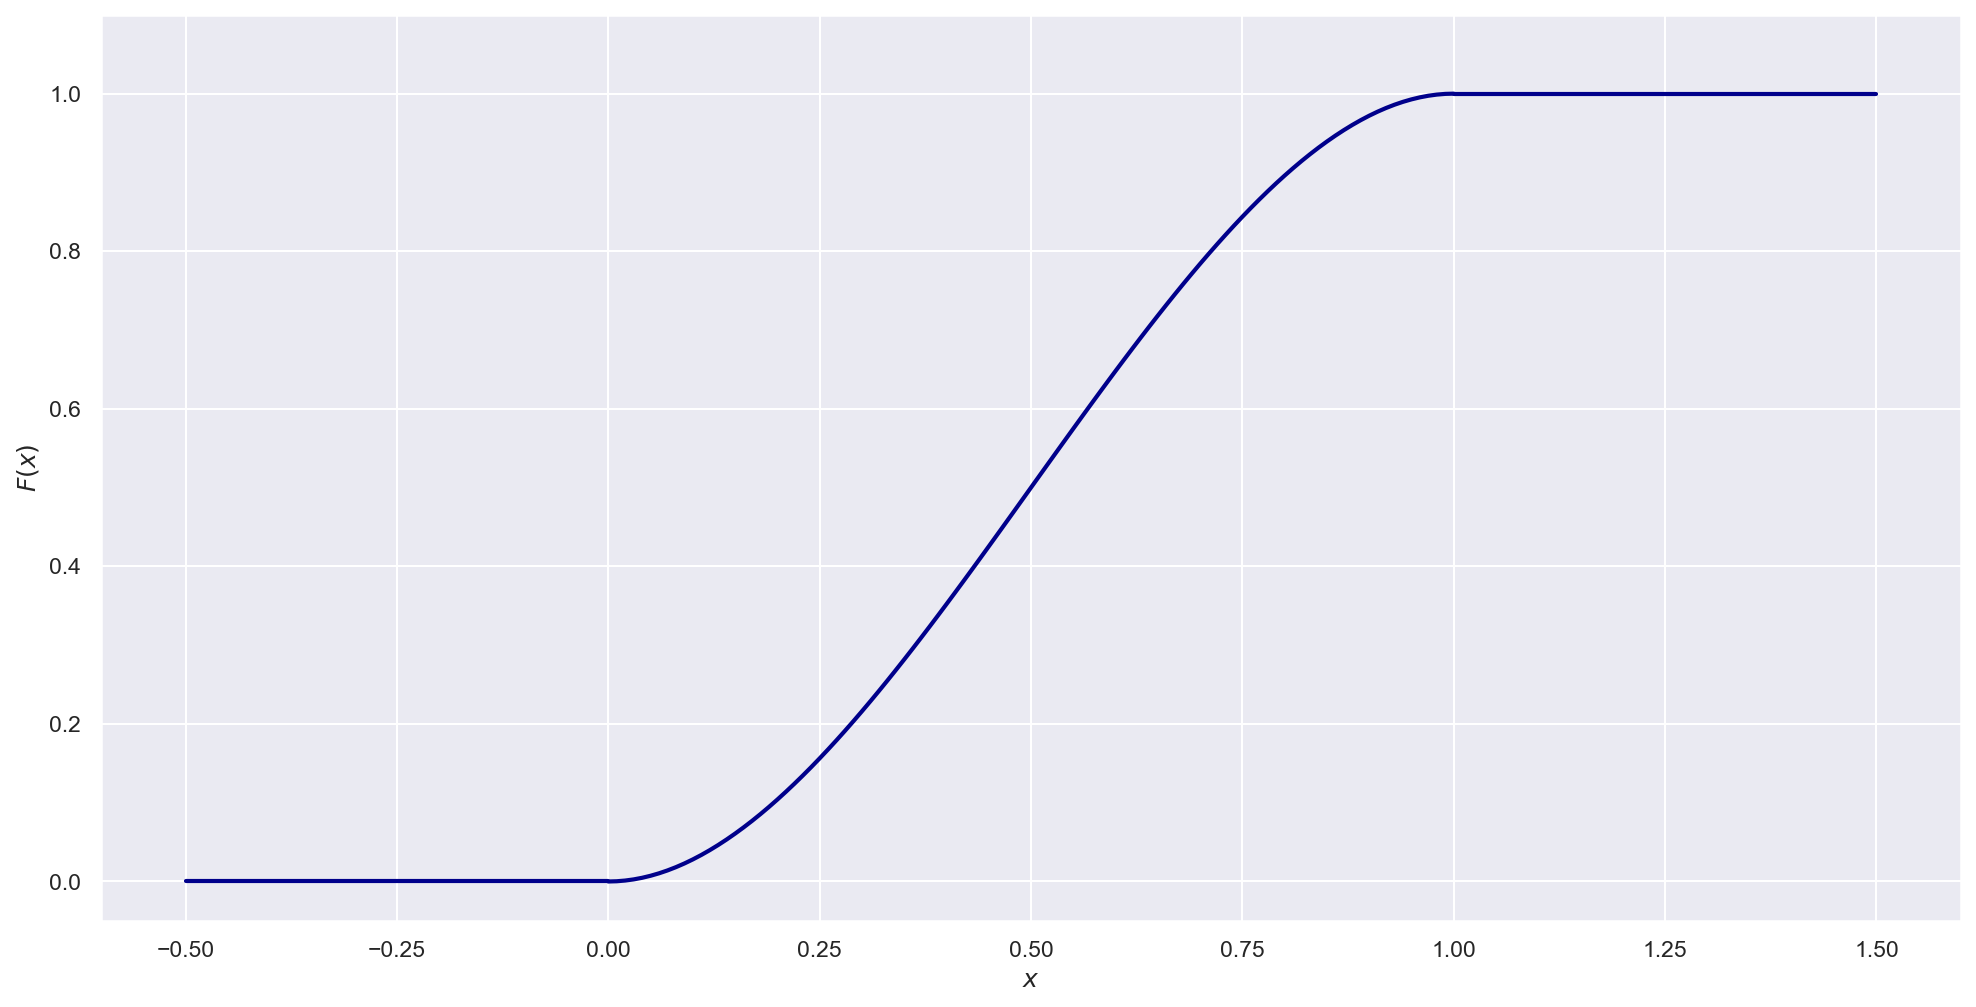

In [15]:
def f2(x):
    return -(x**2)*(2*x-3)-(-(0**2)*(2*-0-3))

x = np.arange(0, 1.01, 0.01)
plt.plot(x, f2(x), color='darkblue', lw=2)
plt.plot([-0.5, 0], [0, 0], color='darkblue', lw=2)
plt.plot([1, 1.5], [1, 1], color='darkblue', lw=2)
plt.ylim(-0.05, 1.1)
plt.xlabel('$x$')
plt.ylabel('$F(x)$');

In [16]:
f2(0.75)

0.84375

The CDF only tells us the chance of Drew getting a score of x, such as 0.75, or lower. How do we use CDF function to estimate the chance of Drew getting a score between two numbers?

**Question:** What is the probability that Drew gets a score between 0.5 and 0.75? We went over the answer using an integral previously, but how can we use this cdf formula to get that same number?

In [17]:
#code here


Notice the cdf flattens out at F(x) = 1. Why is that? What is the maximum value for F(x)?

<a id='normal'></a>
# Normal Distribution

The probability density for the Gaussian or normal distribution is

$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ the standard deviation. The square of the standard deviation, $\sigma^2$ , is called the variance. The area under a normal curve is always 1. 

The function has its peak at the mean, and its “spread” increases with the standard deviation. The normal distribution is useful for the Central Limit Theorem which will be covered in a later lecture. 

The standard normal distribution has a mean of 0, and standard deviation of 1. We can convert any normal distribution to the standard normal distribution by calculating the z scores.

<img src='normal1.png' style='width: 300px'></img>

One convenient characteristic of the normal distribution is the 68 - 95 - 99.7 rule

<img src='normal3.png' style='width: 300px'></img>

Let's test out this rule on the standard normal distribution. 

`stats.norm(mu,sigma).cdf(x)` will give you the CDF of x where all x are follow a normal distribution with mean of mu and standard deviation of sigma.

What are the parameters for a standard normal distribution? <br>

What does it mean when I type in `stats.norm(0,1).cdf(0)`? What should the answer be?

In [22]:
#your code here

Now, let's test out the 68-95-99.7 rule

In [19]:
prob_one_sd_away = ...
prob_two_sd_away = ...
prob_three_sd_away = ...

print(f"Probability that X is one standard deviation away from the mean: {prob_one_sd_away}")
print(f"Probability that X is two standard deviations away from the mean: {prob_two_sd_away}")
print(f"Probability that X is three standard deviations away from the mean: {prob_three_sd_away}")

**Question:** assume the class midterm average follows a normal distribution with mean of 65 and standard deviation of 10. What is the score range for the middle 95% scores? <br>
*answer here*
<br> **Question** Drew scored 85 points. What percent of the class scored better than her? <br> How about if he scored 74 points?
*answer here*

In [20]:
#your code here


<a id='ref'></a>
# Resources

[Stat140 Textbook](http://prob140.org/textbook/content/README.html)

<a id='linear_algebra'></a>
# Linear Algebra

<img src="https://economics.uwo.ca/math/resources/test-yourself-matrix-algebra/images/Matrix.png"/>


<a id='motivation'></a>
## Motivation
Linear algebra is the study of vector spaces, and it encompasses linear equations and functions represented by vector spaces and matrices.
Vectors and matrices are essential for storing data, which is why we often use Python packages such as Numpy and Pandas.
A common problem is linear regression, and we've seen the applications of this task previously. Now it's time to formally discuss what's happening behind closed doors.


<a id='Example'></a>
## Examples

### Spotify
<img src='https://www.scdn.co/i/_global/open-graph-default.png' width='500px' />
Spotify vectorizes their songs in order to find things that you might like. They can find the distance between some of your favorite songs and other songs by artists you haven't listened to before in order to help you discover new artists and songs.


### Word2Vec
<img src='wordgraph.png' width='500px' />
Word2Vec is an open-source natural language processing technique that represents words as vectors in a high-dimensional space. Words with similar meanings tend to be closer to each other in this space, and the relationships between words can be represented as vector operations. Here's a popular example for reference:

$$vector('king') - vector('man') + vector('woman') \approx vector('queen')$$


### Computer Vision
<img src='cnn.png' width='500px' />
Images can be represented as matrices where each element corresponds to a pixel value. Linear algebra operations, especially with the advent of deep learning and convolutional neural networks (CNNs), play a crucial role in image processing tasks.

<a id='notation'></a>
## Notation
Common notation:

* $\mathbf{A}$: Bold capital letters represent matrices
* $\mathbf{x}$: Bold lowercase letters represent vectors
* $\theta$: Non-bold values represent scalars

<a id='terminology'></a>
## Matrix Terminology
* **Identity** matrix: A square matrix with diagonal elements equal to $1$ and all off diagonal elements equal to zero. A $n\times n$ identity matrix is often denoted as $I$ or $I_n$.
* **Order or Size** of matrix: If a matrix has m rows and n columns, the order of the matrix is $m\times n$. We denote the set of (real-valued) matrices $\mathbb{M}_{m,n}$
* **Transpose** of a matrix: The transpose of matrix $\mathbf{A}$ satisfies the condition $\mathbf{A_{j,i}} = \mathbf{A_{i,j}}^T$. That is, the first row of $\mathbf{A}$ is the first column of $\mathbf{A}^T$.
* **Square** matrix: A matrix with the same number of rows as columns. This matrix is in the shape of a square.
* **Diagonal** matrix: A matrix with all the non-diagonal elements equal to $0$ is called a diagonal matrix.
* **Scalar** matrix: An identity matrix multiplied by a constant.
* **Column** matrix: A matrix which consists of exactly $1$ column. If it has $m$ rows, it can be treated as a $m\times 1$ vector. 
* **Row** matrix: A matrix which consists of exactly $1$ row. If it has $n$ columns, it can be treated as a $1\times n$ vector. 
* **Determinant**: A scalar value that can be computed from the elements of a square matrix and encodes certain properties of the linear transformation described by the matrix.
* **Rank**: The maximal number of linearly independent columns of a matrix.


<a id='operation'></a>
## Matrix Operations

Several of the important things that we are going to go over how to code include scalar multiplication, matrix multiplication, matrix inverses, and matrix transposing.

In [1]:
# First, let's import some useful libraries 
import numpy as np 

In [2]:
# Let's declare a couple of matrices to play with 

A = np.array([[-24, -18, 5],
              [20, -15, -4],
              [-5, 4, 1]])

B = np.array([[16, -3, -8], 
              [-10, 15, 4],
              [-9, 4, 1]])



<a id='addsub'></a>
### Addition & Subtraction
if $\mathbf{A}$ and $\mathbf{B}$ are both $m \times n$, we form $\mathbf{A} + \mathbf{B}$ by adding corresponding entries. $$\mathbf{A} = \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix}, \mathbf{B} = \begin{bmatrix} b_1 & b_2\\ b_3 & b_4 \end{bmatrix}, \mathbf{A} + \mathbf{B} = \begin{bmatrix} a_1+b_1 & a_2+b_2\\ a_3+b_3 & a_4+b_4 \end{bmatrix}$$ A fact about matrix addition and transpose is that $(\mathbf{A} + \mathbf{B})^T = \mathbf{A}^T + \mathbf{B}^T$.

Similarly, we can perform subtraction in the same way, where we form $\mathbf{A} - \mathbf{B}$ by subtracting entries of $\mathbf{B}$ from corresponding entries of $\mathbf{A}$.

Note that we can only perform matrix addition and subtraction when both matrices in the operation have the same dimension.

In [4]:
# Addition
print(A + B)

# Subtraction
print(A - B)

[[ -8 -21  -3]
 [ 10   0   0]
 [-14   8   2]]
[[-40 -15  13]
 [ 30 -30  -8]
 [  4   0   0]]


<a id='Scaler-Multiplication'></a>
### Scalar Multiplication
We can multiply a scalar (a.k.a. number) by a matrix by multiplying every entry of the matrix by the scalar. This is denoted $\cdot$ between the scalar and the matrix. $$c \cdot \begin{bmatrix} a_1 & a_2\\ a_3 & a_4 \end{bmatrix} = \begin{bmatrix} c\times a_1 & c\times a_2\\ c\times a_3 & c\times a_4 \end{bmatrix}$$

First, let's do an example of scalar multiplication. It works just like normal multiplication. 

In [5]:
5 * A

array([[-120,  -90,   25],
       [ 100,  -75,  -20],
       [ -25,   20,    5]])

<a id='matrix_mul'></a>
### Matrix Multiplication
If $\mathbf{A}$ is $m \times p$ and $\mathbf{B}$ is $p \times n$, we can form $\mathbf{C} = \mathbf{A}\mathbf{B}$, which has dimension $m \times n$. For matrix multiplication to occur, the number of columns of $\mathbf{A}$ has to equal the number of rows of $\mathbf{B}$. A fact about matrix multiplication and transpose is that $(\mathbf{A}\mathbf{B})^T = \mathbf{B}^T\mathbf{A}^T$.$$\begin{bmatrix} b_{11} & b_{12}\\ b_{21} & b_{22} \\ b_{31} & b_{32} \end{bmatrix} = \begin{bmatrix} \mathbf{a_{1\cdot}}\cdot \mathbf{b_{\cdot1}} & \mathbf{a_{1\cdot}}\cdot \mathbf{b_{\cdot2}}\\ \mathbf{a_{2\cdot}}\cdot \mathbf{b_{\cdot1}} & \mathbf{a_{2\cdot}}\cdot \mathbf{b_{\cdot2}} \end{bmatrix}$$ where $\mathbf{a_{i\cdot}}$ is the $i$th row of matrix $\mathbf{A}$ and $\mathbf{b_{\cdot j}}$ is the $j$th column of matrix $\mathbf{B}.$

For matrix multiplication, in general we don't have $\mathbf{A}\mathbf{B} = \mathbf{B}\mathbf{A}$.

Next, write down matrix multiplication. Unfortunately, it is slightly different from scalar multiplication

In [6]:
# Product of A and B
AB = np.dot(A, B)
print(AB)

# Next, try out the product of B and A. Remember, order matters! 
BA = np.dot(B, A)
print(BA)

[[-249 -178  125]
 [ 506 -301 -224]
 [-129   79   57]]
[[-404 -275   84]
 [ 520  -29 -106]
 [ 291  106  -60]]


**Exercise**: If $\mathbf{A}$ is $a \times b$ and $\mathbf{B}$ is $b \times c$, what are the dimensions of $(\mathbf{A}\mathbf{B})^T? $ How about $(\mathbf{B}\mathbf{A})^T$?

*your response here*

<a id='linear_independence'></a>
## Linear Independence
What does it mean for a set of vectors to be **linearly independent**? It is easier to define what it means to be linearly dependent. A set of vectors $$\mathbf{x_1, x_2, ..., x_n}$$ is linearly dependent if there exist scalars ${\alpha_1, \alpha_2, ..., \alpha_n}$, not all equal to 0 such that $$\sum_{i=1}^n \alpha_ix_i = 0.$$
In words, this means that there exists at least one vector that can be written as a linear combination of the remaining vectors.


<img src="https://thejuniverse.org/PUBLIC/LinearAlgebra/LOLA/indep/linIndep.png">


<a id='invert'></a>
## Invertibility
The inverse of an $n\times n$ matrix $\mathbf{A}$, denoted as $\mathbf{A}^{-1}$, satisfies the following properties:

$$\mathbf{A A}^{-1} = I_{n\times n},\ \mathbf{A}^{-1} \mathbf{A}=I_{n\times n}.$$
We may consider a concrete example with a $2\times 2$ matrix. 
$$\mathbf{A} = \begin{bmatrix} a & b\\ c & d\end{bmatrix}$$
$$\mathbf{A}^{-1} = \frac{1}{(\det \mathbf{A})}\begin{bmatrix} d & -b\\ -c & a\end{bmatrix} = \frac{1}{ad-bc} \begin{bmatrix} d & -b\\ -c & a\end{bmatrix}$$

For inverting matrices of higher dimensions, the calculation is much more difficult. We will often want to use a computer to compute these for us. But why do we care about inverse matrices in the first place? Why do they come up in linear regression?

The answer to this will show up toward the end of this lecture when we consider the normal equations.

Remember for later: If a matrix $\mathbf{A}$ is invertible, so is its transpose, and the inverse of $\mathbf{A}^T$ is the transpose of the inverse of $\mathbf{A}$: $(\mathbf{A}^T)^{-1} = (\mathbf{A}^{-1})^T$.

**If a matrix has full rank, then all rows (and cols) are linearly independent. This implies that the determinant is non-zero.**

**Exercise**: Are the vectors $$ \begin{bmatrix} 1 \\ 2\\ -1 \end{bmatrix} , \begin{bmatrix} 0 \\ 1\\ -1 \end{bmatrix}, \begin{bmatrix} 1 \\ 1\\ 0 \end{bmatrix} $$ linearly independent? 

*your response here*

**Exercise**: If the columns of a matrix are linearly independent, is the matrix invertible?

*your response here*

[a very good explanation here](https://www.youtube.com/watch?v=Ip3X9LOh2dk&ab_channel=3Blue1Brown)

### Matrix Inverse
Now we are going to try out inverses. We are going to be using some linear algebra functions from the numpy function. 

These functions are accessed by calling `numpy.linalg`.

In [7]:
#Try to find the inverse of matrix A. Notice how easy this is compared to doing it by hand
inv = np.linalg.inv(A)
print(inv)


# Observe how the results are not exact. Sometimes there are rounding errors when the computer is calculating 
# the inverse of a matrix. This can resolved by rounding (you can use np.matrix.round(yourMatrixHere)) or simply 
# ignored since it is such a small error. 
print(np.round(inv))

[[ 1.00000000e+00  3.80000000e+01  1.47000000e+02]
 [-9.62193288e-17  1.00000000e+00  4.00000000e+00]
 [ 5.00000000e+00  1.86000000e+02  7.20000000e+02]]
[[  1.  38. 147.]
 [ -0.   1.   4.]
 [  5. 186. 720.]]


### Matrix Linear Independence 

However, as we learned earlier, not all matricies are invertible. How can we tell if a matrix is invertible or not? 

In [8]:
# If a matrix's determinant is 0, it is not invertible

if np.linalg.det(A) == 0:
    print("Matrix is not invertible")
else:
    print("Matrix is invertible")

Matrix is invertible


<a id='transpose'></a>
### Transpose
The transpose converts row vectors into column vectors, and vice versa. For example, for a $3 \times 2$ matrix $\mathbf{A}$ where $$ \mathbf{A} = \begin{bmatrix} 0 & 4\\ 7 & 0 \\ 3 & 1\end{bmatrix}, \mathbf{A}^T = \begin{bmatrix} 0 & 7 & 3\\ 4 & 0 & 1\end{bmatrix}$$ 

Note that $$(\mathbf{A}^T)^T = \mathbf{A}$$

Lastly, let's try to find the transpose of a matrix 

In [9]:
# Let's transpose that matrix!!! 
A.transpose()

array([[-24,  20,  -5],
       [-18, -15,   4],
       [  5,  -4,   1]])

<a id='loss'></a>
## Optimal $\hat{\beta}$: OLS

Assume we have a dataset with **n** rows and **d** columns. Therefore, we will create the following model:

$$ y_i = \beta_0 + \beta_1x_{i1} + \dots + \beta_dx_{id} + \epsilon_i$$

$$for \space\space i = 1, ..., n$$

We can then stack these equations together and write them in matrix form:

$$ y = X\beta + \epsilon$$

Where:

$$ y = \begin{bmatrix} y_1\\ y_2\\ y_3\\ \vdots \\ y_n \end{bmatrix}$$

$$ X = \begin{bmatrix}
1&x_{11}&\dots&x_{1d}\\
1&x_{21}&\dots&x_{2d}\\
\vdots&\vdots&\ddots&\vdots\\
1&x_{n1}&\dots&x_{nd}\\
\end{bmatrix}$$

$$ \beta = \begin{bmatrix} \beta_0\\ \beta_1\\ \beta_2\\ \vdots \\ \beta_d \end{bmatrix}$$

And our error term $\epsilon$ is a vector in $\mathbb{R}^n$ that adds "noise" to our linear relationship.

Now that we have our data, we want to find the values of the vector $\beta$ that help us predict $y$ the best. In other words, we want to find the weights that we place on each column (or feature) of our data $X$, that minimize the difference between our actual values of $y$ and our predicted values $\hat{y}$.

One method to find our optimal weights (or coefficients) $\beta$ is known as **Ordinary Least Squares (OLS)**. There are a number of assumptions necessary for OLS, but for the purposes of this notebook we can just assume that all assumptions are met.

<img src='linear_regression.png' width=400, height=600>


We can use OLS to minimize the sum of squared residuals. The solution to OLS is given by the equation: <br>
$$ \hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty$$ <br>
where $$\hat{\beta}_{OLS}$$ is the vector of the coefficients of each feature.

It turns out that the inverse in the equation above is sometimes hard or even impossible to compute (what would be some cases where it's impossible?). As a result, even though linear regression has a closed form solution, sometimes an algorithm like gradient descent (covered in a bit) is used to find the optimal values of $\beta$.

### Derivation of Ordinary Least Squares


***This is just the formal proof of the expression above. We won't be looking at this extensively.***

Let:

$$ A = \begin{bmatrix} 3\\ -4\\ 5\end{bmatrix}$$

Then the L1 Norm of A is:

$$ \Vert A \Vert_1 = |3| + |-4| + |5| = 12$$

And the L2 Norm Squared of A is:

$$ \Vert A \Vert_2^2 = A^TA = (3)^2 + (-4)^2 + (5)^2 = 50$$

---

We can use OLS to minimize the sum of squared residuals:

$$\hat{\beta}_{OLS} = \underset{\beta}{\operatorname{argmin}} \Vert X\beta - y\Vert_2^2$$

Now how do we minimize this expression? Let us define our objective, [or cost function](https://stats.stackexchange.com/questions/179026/objective-function-cost-function-loss-function-are-they-the-same-thing), as:

$$ L(\beta) = \sum_{i=1}^{n}(y_i - x_i^T\beta)^2 = \Vert X\beta - y\Vert_2^2$$

First just rewrite this expression and FOIL.

$$ L(\beta) = (X\beta - y)^T(X\beta - y)$$

$$ = (X\beta)^T(X\beta) - (X\beta)^Ty - y^TX\beta + y^Ty $$

$$ = \beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty$$

It can be proven that our objective function $L(\beta)$ is convex. This means that any critical point is a global minimum. So throwback to AP Calculus, what can we do?

$$ \nabla_\beta L(\beta) = \nabla_\beta (\beta^TX^TX\beta - 2\beta^TX^Ty + y^Ty)$$

$$ = \nabla_\beta(\beta^TX^TX\beta) - 2\nabla_\beta(\beta^TX^Ty) + \nabla_\beta(y^Ty)$$

$$ = 2X^TX\beta - 2X^Ty = 0$$

Thus,

$$ X^TX\hat{\beta}_{OLS} = X^Ty$$

$$ \hat{\beta}_{OLS} = (X^TX)^{-1}X^Ty$$

<a id='grad'></a>
## Optimal $\hat{\beta}$: Gradient Descent

The gradient descent algorithm is a method used to minimize some cost function that we have and now it's finally time to take a look at it.

The basic idea is that we start at some random point x and then compute the derivative (or gradient) of our cost function at that point.

We then move in the direction of the gradient with fixed step size gamma and compute our new location x. 

The implication of this is that if the gradient is "steep" at the point we are standing at then our step size is going to cause us to take a big step down but if the gradient is close to 0 then we will only be taking a very small step. 

The algorithm converges once the movement from our old point x to our new point x is below some precision level. In other words, our steps become very small and we essentially get stuck.

**[Gradient Descent Algorithm:](https://www.youtube.com/watch?v=sDv4f4s2SB8)**

1. **Initialization:** 
   - Choose an initial vector of parameters $( \mathbf{w} )$ and set the learning rate $( \gamma )$.
    
2. **Iterate until Convergence:**
   - Compute the gradient: $( \nabla J(\mathbf{w}) )$.
   - Update the weights:
     \[
     $\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \gamma \nabla J(\mathbf{w}_{\text{old}})$
     \]
    
3. **Convergence Test:** 
   - Check if the difference between $( \mathbf{w}_{\text{new}} )$ and $( \mathbf{w}_{\text{old}} )$ is below a certain threshold or if the change in the cost function $( J(\mathbf{w}) )$ is below a threshold.


Let's now look at an example where we use gradient descent to find the minimum of the function:

$$ f(x) = (x-5)^2 + x - 8$$

But before we start, let's do a little calculus review and tell me what the global minimum of $f(x)$ is.

In [5]:
def f(x):
    return (x - 5)**2 + x - 8

def df(x):
    return 2*x - 9

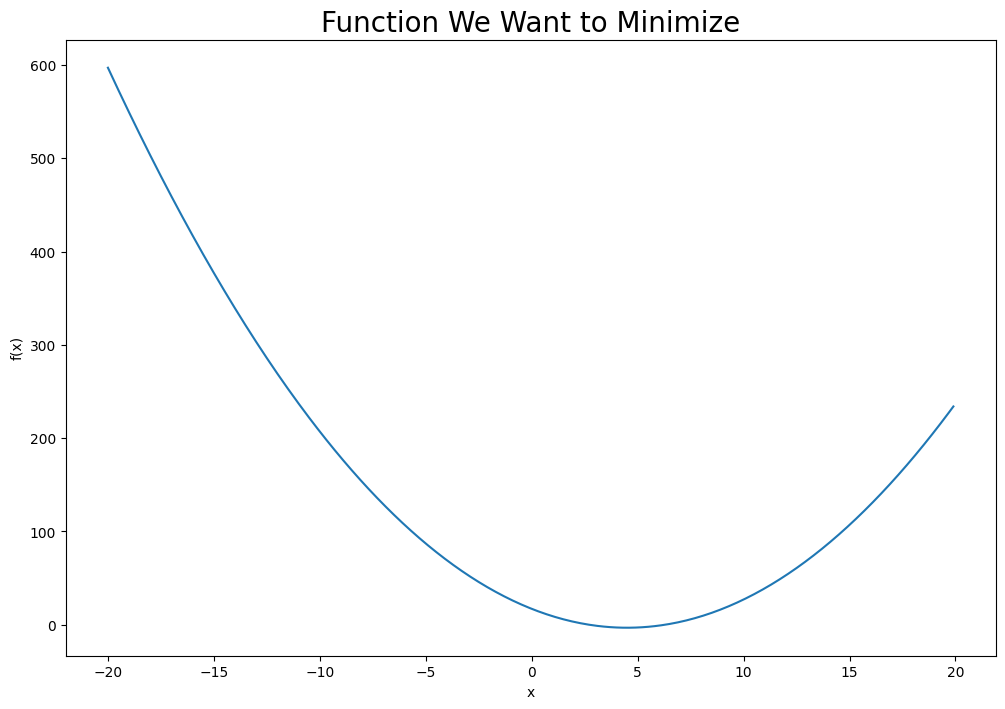

In [6]:
x_range = np.arange(-20, 20, .1)
y = f(x_range)

fig, ax = plt.subplots(figsize=(12, 8))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Function We Want to Minimize", fontsize=20)
plt.plot(x_range, y);

In [7]:
# initialize random start point
initial_x = np.random.randint(-20, 20)

# initialize previous step size
prev_step_size = 1

# Step size
gamma = .01

# Precision for convergence
precision = 0.0001  

# Max number of iterations
max_iters = 10000  

# Step counter
iters = 0

curr_x = initial_x

while prev_step_size > precision and iters < max_iters:
    prev_x = curr_x 
    curr_x = curr_x - gamma * df(prev_x) 
    prev_step_size = abs(curr_x - prev_x)
    iters = iters + 1 
    #print("Iteration", iters, "\nX value is", curr_x) 
    
print("")
print("Our random start point was", initial_x)
print("There was convergence after", iters, "steps")
print("The global minimum occurs at", curr_x)


Our random start point was 7
There was convergence after 309 steps
The global minimum occurs at 4.504861803452025


Awesome! In the example above traditional gradient descent appears to have performed well for us because our function $f(x)$ is strictly convex. In fact there are a number of reasons why gradient descent may not work well, can you think of some? In practice, there are a number of [variations](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3) of the basic gradient descent algorithm above that are used.